#IMPORTING IMPORTANT LIBRARIES

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#DATA COLLECTION

In [92]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [93]:
iris.shape

(150, 6)

In [94]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [95]:
iris.dropna(inplace=True)

In [96]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [97]:
#dropping duplicate rows and columns.
iris.drop_duplicates()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [98]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [99]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#EXPLORATORY DATA ANALYSIS

In [100]:
df_sp=iris.groupby('Species')


<Axes: xlabel='Species', ylabel='count'>

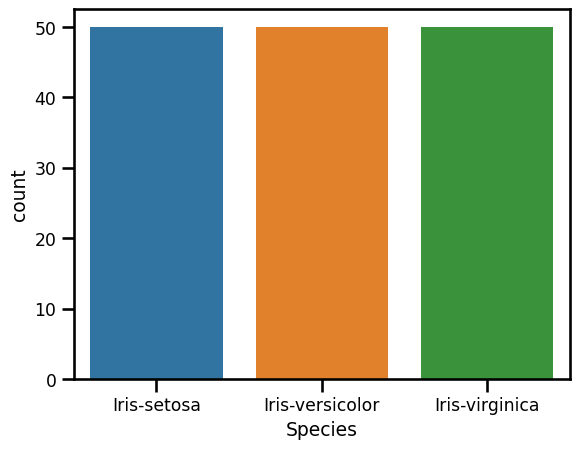

In [101]:
sns.countplot(data=iris,x='Species')

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

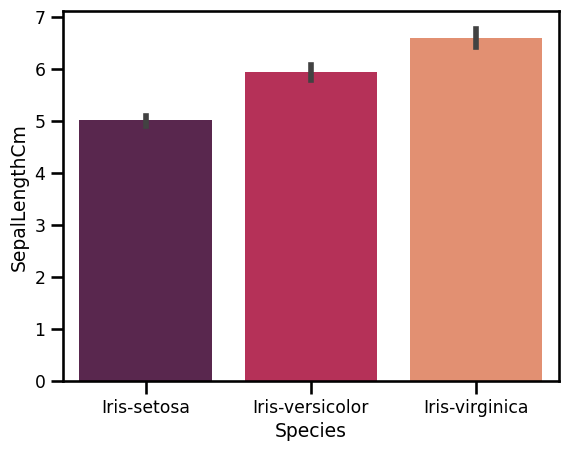

In [102]:
sns.barplot(data=iris,x='Species',y='SepalLengthCm',palette='rocket')

                                  -Iris-virginica has the largest Sepal Length.

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

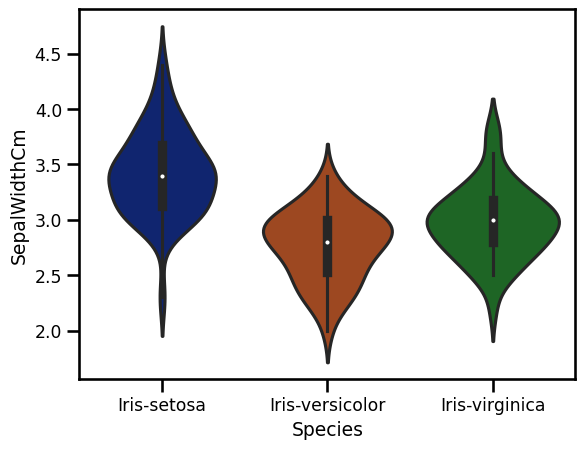

In [103]:
sns.violinplot(x="Species", y="SepalWidthCm", data=iris,palette='dark')

                                  -Iris-setosa has the largest Sepal Width.

C:\python 311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


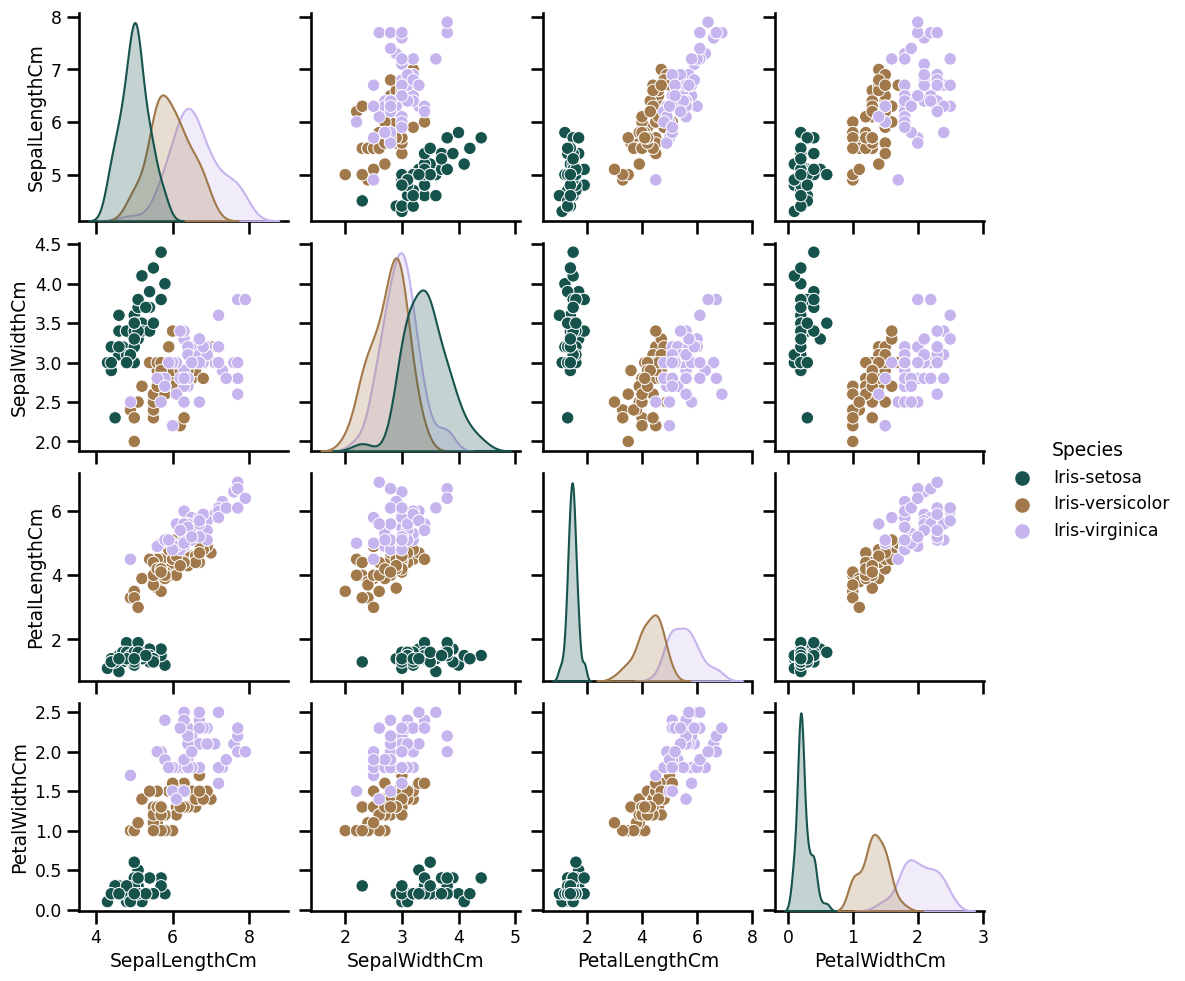

In [104]:
sns.pairplot(iris.drop(['Id'],inplace=False,axis=1),hue='Species',palette='cubehelix')

<Axes: >

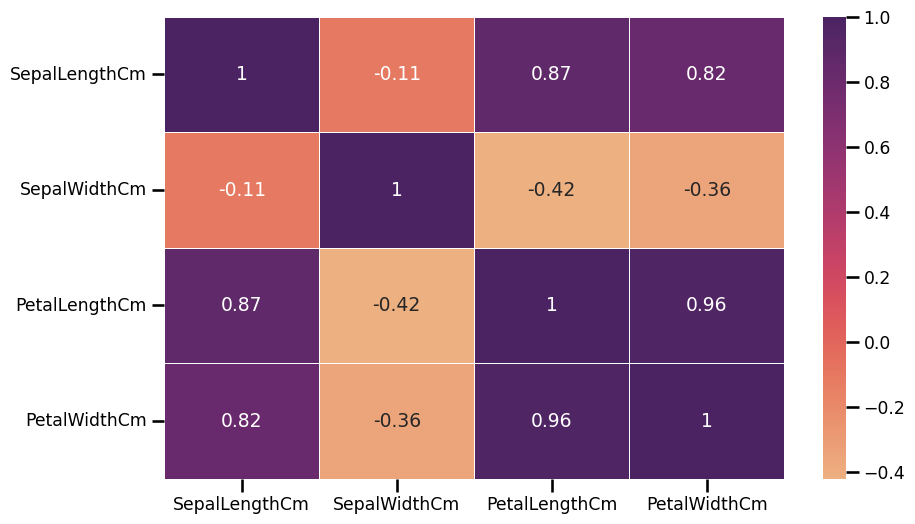

In [175]:
# displaying the correlation matrix using a heatmap
heat_maps = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10, 6))
sns.set_context('talk', font_scale=0.75)
sns.heatmap(heat_maps, annot=True, cmap='flare',linecolor="w", linewidths=0.5)

#DATA PREPROCESSING

In [106]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
iris['Species']=LE.fit_transform(iris['Species'])
iris.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


#MODEL TRAINING

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [108]:
X=iris.drop(['Id','Species'],inplace=False,axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [155]:
y=iris['Species']

In [156]:
# Spliting the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.6,random_state=101)

In [157]:
model_1=LogisticRegression()

In [158]:
model_1.fit(X_train,y_train)

C:\python 311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
predict1=model_1.predict(X_test)
predict1

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 2])

In [160]:
from sklearn.metrics import accuracy_score
print("Accuracy Score(Logistic Regression):",accuracy_score(y_test,predict))

Accuracy Score(Logistic Regression): 0.9888888888888889


In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      0.97      0.98        32
           2       0.96      1.00      0.98        26

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



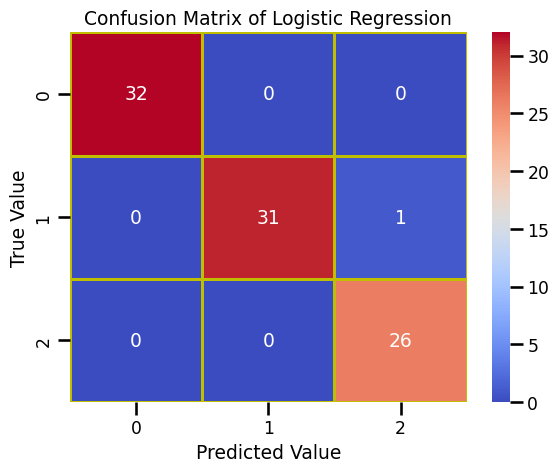

In [180]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1 = confusion_matrix(y_test, predict1)
sns.heatmap(conf_matrix1, annot=True, cmap='coolwarm', xticklabels=np.unique(y), yticklabels=np.unique(y),linecolor="y", linewidths=1)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [162]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier()
model_2.fit(X_train, y_train)

KNeighborsClassifier()

In [164]:
predict2=model_2.predict(X_test)
predict2

array([0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0,
       2, 2])

In [166]:
print("Accuracy Score(KNeighborsClassifier):",accuracy_score(y_test,predict2))

Accuracy Score(KNeighborsClassifier): 0.9444444444444444


In [165]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.89      0.97      0.93        32
           2       0.96      0.85      0.90        26

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90



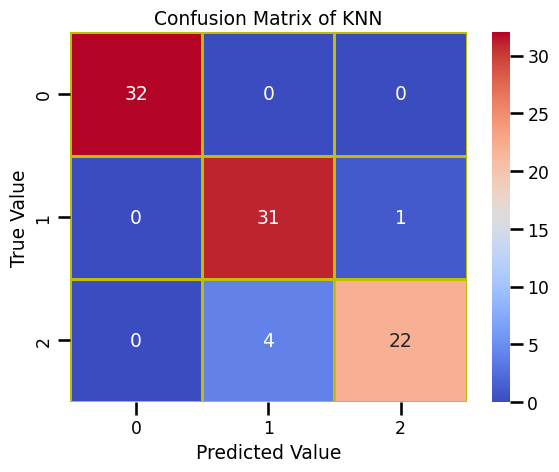

In [181]:
from sklearn.metrics import confusion_matrix
conf_matrix2 = confusion_matrix(y_test, predict2)
sns.heatmap(conf_matrix2, annot=True, cmap='coolwarm', xticklabels=np.unique(y), yticklabels=np.unique(y),linecolor="y", linewidths=1)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix of KNN')
plt.show()